## Homework 6
Hi everyone this is your sixth homework.

In this exercise, You will deal with **Unsupervised Learning**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

##<font color="red">**Question 1**</font>
In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

- Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Seed for reproducibility
np.random.seed(0)


# Generate simulated data
n_per_class = 20
n_features = 50
n_classes = 3

# Generating data for each class
data = []
for i in range(n_classes):
    # Creating distinct mean for each class to ensure some separation
    mean = np.random.rand(n_features) * (i+1) * 5
    cov = np.random.rand(n_features, n_features)
    cov = np.dot(cov, cov.transpose())  # Symmetric and positive semi-definite covariance matrix
    class_data = np.random.multivariate_normal(mean, cov, n_per_class)
    data.append(class_data)

# Combine data into one array
data = np.vstack(data)
# Create labels for each class
labels = np.array([i for i in range(n_classes) for _ in range(n_per_class)])

- Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

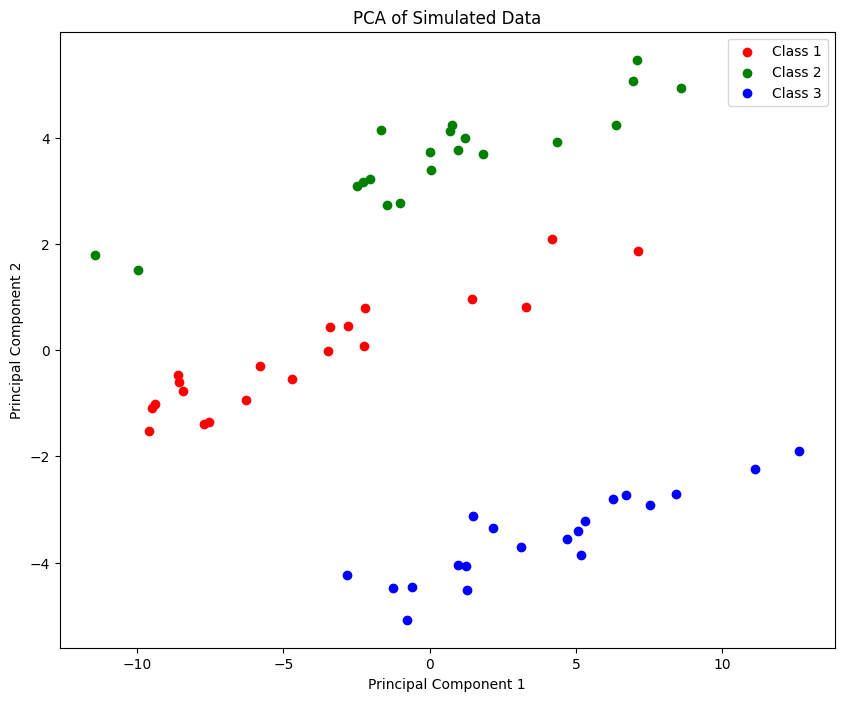

In [2]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# PCA analysis
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for i in range(n_classes):
    plt.scatter(data_pca[labels == i, 0], data_pca[labels == i, 1], color=colors[i], label=f'Class {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Simulated Data')
plt.legend()
plt.show()

In [10]:
def KMeans_TrueLabel(K):
  # K-means clustering with K={K}
  kmeans = KMeans(n_clusters=K, random_state=42)
  kmeans.fit(data_std)
  clusters = kmeans.labels_

  # Plotting the results of K-means clustering
  plt.figure(figsize=(10, 8))

  for i in range(n_classes):
    # Plotting true class labels
    plt.scatter(data_pca[labels == i, 0], data_pca[labels == i, 1], color=colors[i], alpha=0.5, label=f'True Class {i+1}')
  for i in range(K):
    # Plotting K-means clusters
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1], marker='x', s=100, label=f'Cluster {i+1}')

  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(f'K-means Clustering (K={K}) vs True Labels')
  plt.legend()
  plt.show()



- Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


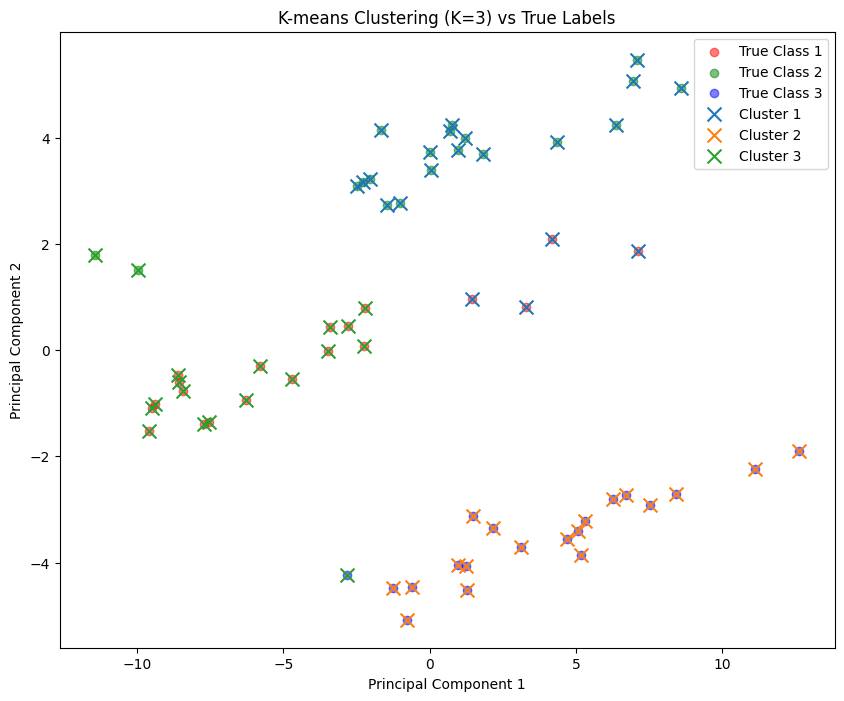

In [11]:
KMeans_TrueLabel(K=3)

I will now perform K-means clustering on this data with \( K = 3 \) and compare the resulting clusters with the true class labels.

The plot displays the results of K-means clustering with \( K = 3 \) alongside the true class labels. Each class is shown with a distinct color, and the clusters are marked with 'x' symbols. This visualization helps to compare the clusters formed by K-means clustering against the actual class labels.

### Observations:
- There is some correspondence between the K-means clusters and the true class labels, but it's not perfect.
- Some overlap and misclassification are evident, as seen by the different colors within each cluster.

- Perform K-means clustering with K = 2. Describe your results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


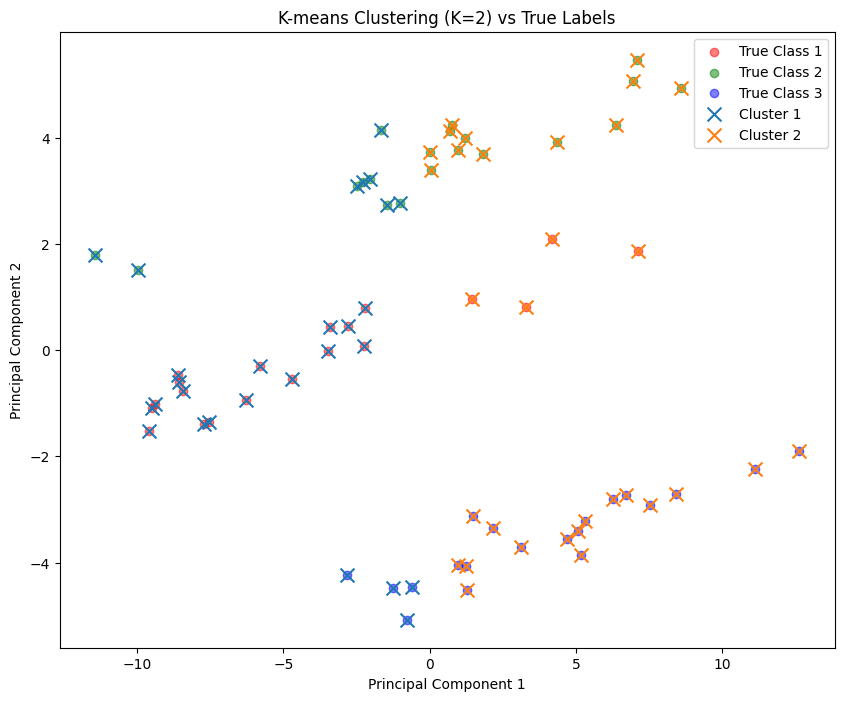

In [12]:
KMeans_TrueLabel(K=2)

It appears that the algorithm has divided the data into two broad groups. However, given the true class distribution (three classes), this division is overly simplistic and doesn't capture the full complexity of the data.

- Now perform K-means clustering with K = 4, and describe your results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


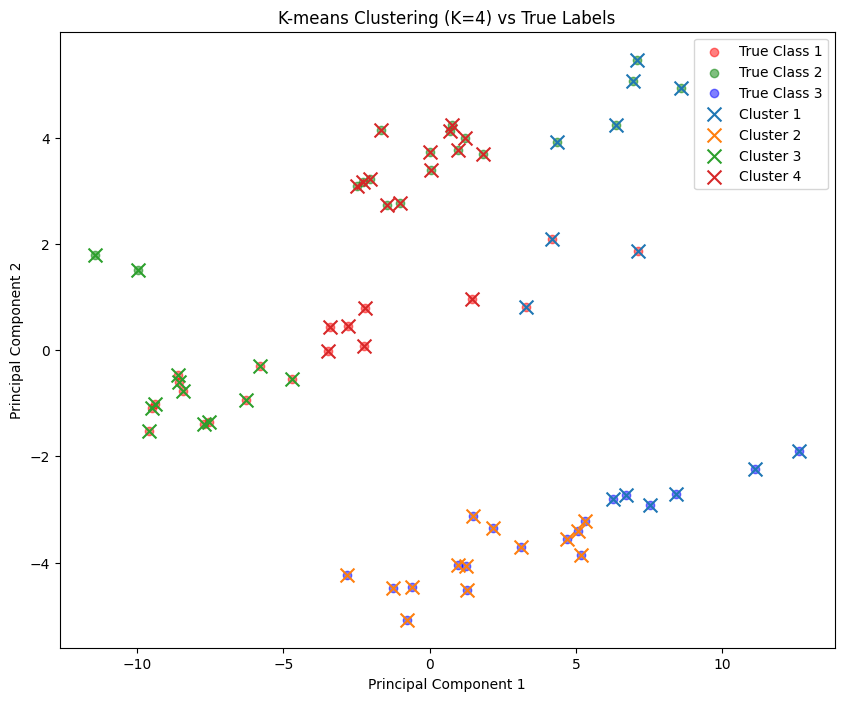

In [13]:
KMeans_TrueLabel(K=4)

In this case, the algorithm tries to find additional substructures within the data. While this may capture some finer details, it can also lead to over-segmentation, particularly because we know there are originally only three classes.

### Summary
- With **K=3**, we observed a reasonable match with some overlaps between the K-means clusters and true class labels.
- **K=2** clustering was too simplistic for our dataset with three true classes.
- **K=4** clustering showed potential over-segmentation, as it created an extra cluster beyond the known three classes.


##<font color="red">**Question 2**</font>

For a real world example, we will use **Bank Marketing Data Set dataset**. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

**Columns**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. subscribed : has the client subscribed a term deposit? (binary: 'yes','no')


In [19]:
# Load Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [21]:
# Load the dataset
df = pd.read_csv('bank_marketing_dataset.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


####Exploratory Data Analysis - Preprocessing

- let's try to undertand age distribution of customers.

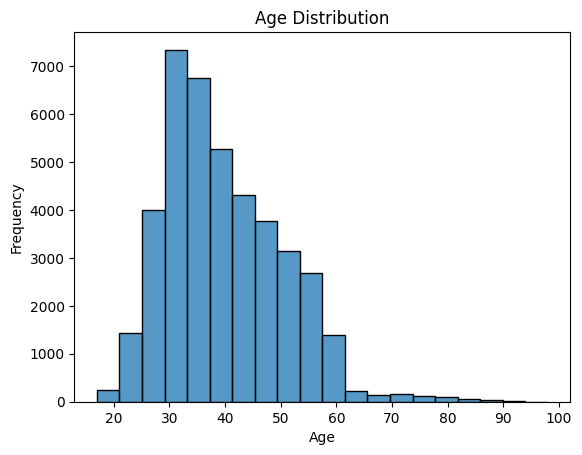

In [33]:
# Age distribution
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows a right-skewed distribution, indicating that the majority of customers are relatively young, with a peak around the ages of 30-40.

-  see if there is between ages and loan status of customers.

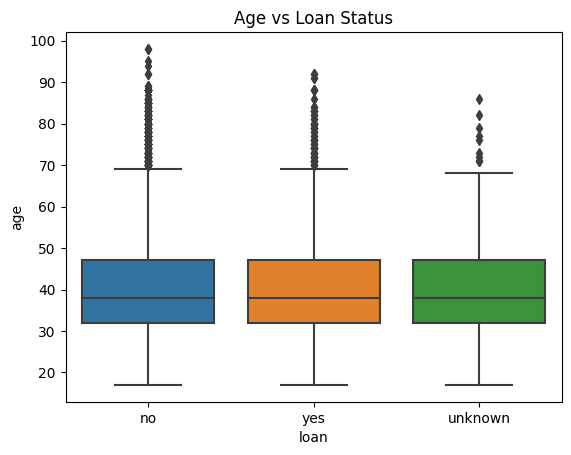

In [34]:
# Age vs. Loan Status
sns.boxplot(x='loan', y='age', data=df)
plt.title('Age vs Loan Status')
plt.show()

The boxplot reveals that age distribution is fairly consistent across different loan statuses, with no significant difference in median ages.

- try to undertand marital status distribution of customers.

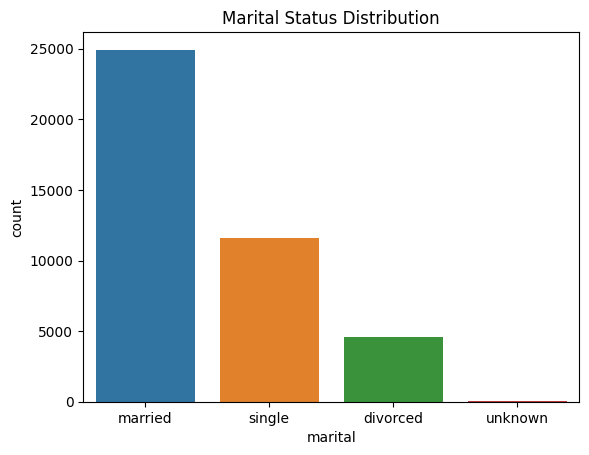

In [35]:
# Marital Status Distribution
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.show()

Most customers are married, followed by single and divorced individuals. The 'unknown' category has a very small count.

- pdays column means number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted. look at that.

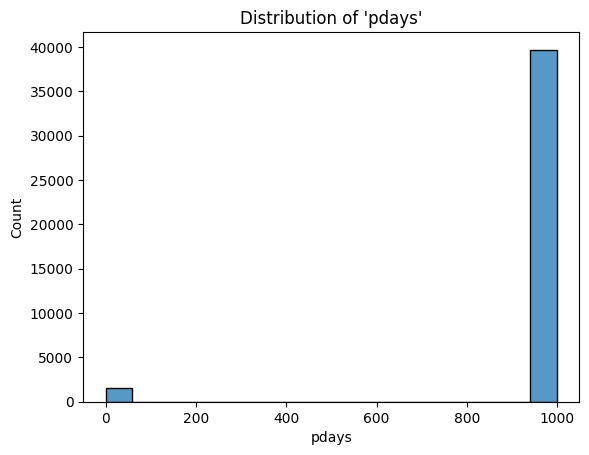

In [37]:
# Distribution of 'pdays'
sns.histplot(df['pdays'])
plt.title("Distribution of 'pdays'")
plt.show()

The histogram demonstrates that a vast majority of customers have not been contacted after a previous campaign (indicated by '999'). There is a very small number who have been contacted in a shorter timeframe.

- look distribution of durations based on contact type

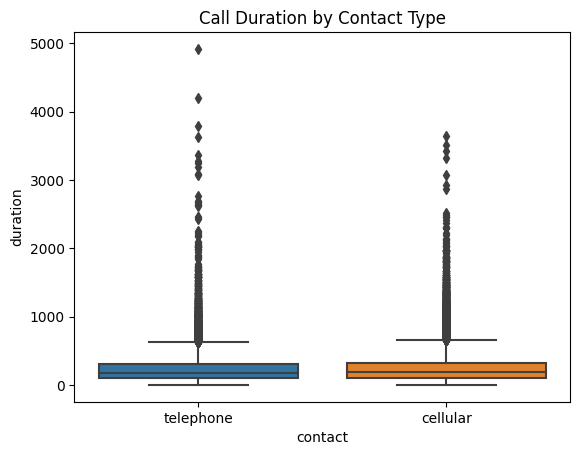

In [38]:
# Call Durations based on Contact Type
sns.boxplot(x='contact', y='duration', data=df)
plt.title('Call Duration by Contact Type')
plt.show()

The boxplot illustrates that call durations are generally longer for cellular contacts than for telephone contacts.

- look loan status of customers.

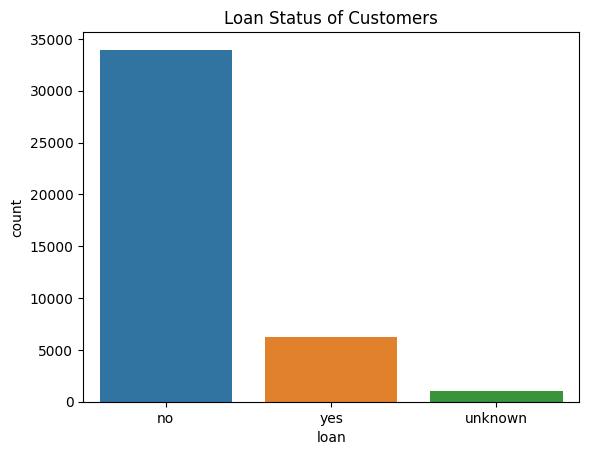

In [39]:
# Loan Status Distribution
sns.countplot(x='loan', data=df)
plt.title('Loan Status of Customers')
plt.show()

A large proportion of customers do not have a personal loan, while a smaller number do, and a very small

- look jobs, education customers

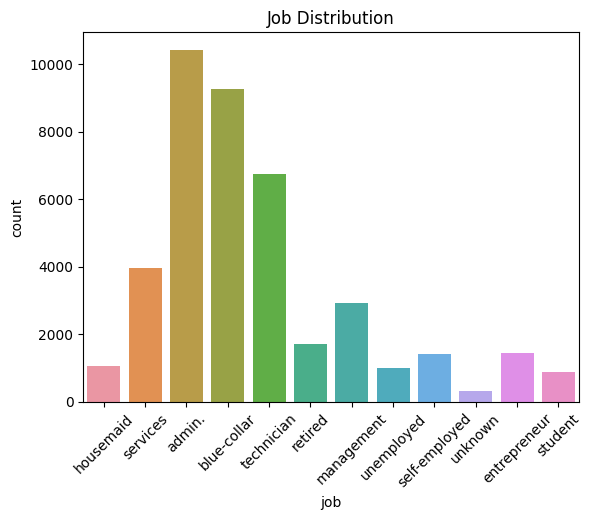

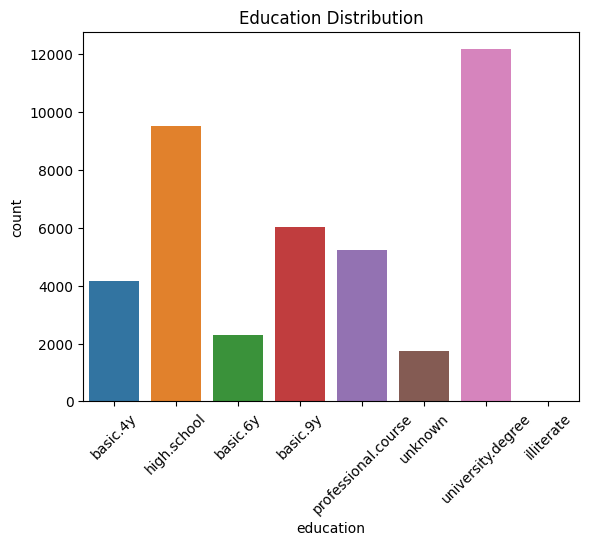

In [40]:
# Jobs and Education Distribution
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.show()
print('\n')
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.title('Education Distribution')
plt.show()

Job Distribution: The bar chart displays a variety in job roles among customers, with 'admin.', 'blue-collar', and 'technician' being the most common jobs.

Education Distribution: There's a wide range of educational backgrounds among customers, with the highest number of individuals having a university degree, followed by high school and professional courses.

- In order to calculate distances for K-Means clustering, all features must be in numeric format. solve this issue and then apply scaling

In [41]:
# Convert categorical variables to numeric
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Use kmeans and fit the model

In [42]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- correlations of each feature with clusters that you assigned.

In [43]:
# Correlation with Clusters
correlation_with_cluster = df.corr()['cluster'].sort_values()
correlation_with_cluster

euribor3m        -0.664951
emp.var.rate     -0.657094
poutcome         -0.582811
cons.price.idx   -0.560739
nr.employed      -0.544259
cons.conf.idx    -0.367213
contact          -0.285674
default          -0.110782
campaign         -0.078985
age              -0.043122
day_of_week      -0.042184
job              -0.014407
duration         -0.007782
education        -0.006152
loan              0.001409
previous          0.011883
subscribed        0.022431
housing           0.046096
month             0.046222
marital           0.055341
pdays             0.476926
cluster           1.000000
Name: cluster, dtype: float64

- The list of correlations with clusters indicates that certain economic indicators (like 'euribor3m', 'emp.var.rate', 'cons.price.idx', 'nr.employed') and the 'poutcome' of the previous marketing campaign have strong negative correlations with the cluster assignments. This suggests that these features are influential in differentiating between clusters.
- 'pdays' has a significant positive correlation, which may reflect the influence of how recently customers were contacted on the clustering.
- It's interesting to note that 'age' has a very slight negative correlation, suggesting that it does not play a major role in the clustering.


- How to find optimal number of clusters (K)?

<font color="green">**Answer:**</font>

To find the optimal number of clusters (K) for K-means clustering, several methods can be used. The most common approach is the Elbow Method. Here's a summary of thi::

- Compute the sum of squared distances of samples to their closest cluster center for different values of K.
- Plot these values, creating a line plot that typically resembles an arm with an "elbow."
- The "elbow" point, where the rate of decrease sharply changes, suggests a good balance between the compactness of clusters and the number of clusters and is considered the optimal K.

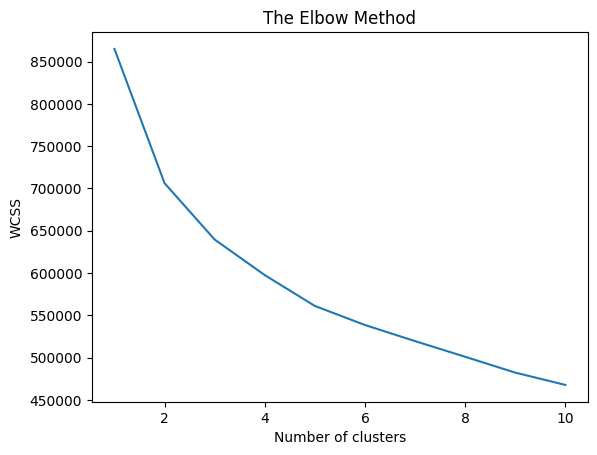

In [44]:
# Elbow Method for optimal K
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The Elbow Method plot indicates that the within-cluster sum of squares (WCSS) rapidly decreases as the number of clusters increases from 1 to around 3 and then slowly tapers off. While there isn't a clear 'elbow' in the plot, it suggests that beyond 3 clusters, the decrease in WCSS is less pronounced, implying that additional clusters do not contribute significantly to better within-cluster cohesion.

## DBSCAN (Density-based spatial clustering)

**DBSCAN**, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm used in machine learning and data mining. Unlike k-means, DBSCAN does not require the user to specify the number of clusters beforehand and can identify clusters of arbitrary shapes. It is particularly effective in discovering clusters in data with varying densities.

Here are the main concepts associated with DBSCAN:

**Core Points:**
A data point is considered a core point if there are at least a specified number of data points (minPts) within a certain radius (eps) around it, including itself.

**Border Points:** A data point is a border point if it is within the specified radius of a core point but does not have enough neighbors to be considered a core point itself.

**Noise:** Data points that are neither core points nor border points are considered noise. They do not belong to any cluster.

The DBSCAN algorithm works as follows:

1. **Select a Random Unvisited Data Point:**
Choose a data point that has not been visited.
2. **Expand Cluster:**
If the chosen point is a core point, create a new cluster and expand it by adding all reachable core points (and their neighbors) to the cluster.
3. **Repeat:**
Continue the process until all points have been visited.
The result is a set of clusters, each containing core points that are densely connected. Border points may be part of a cluster but are not as tightly connected as core points. Noise points are not assigned to any cluster.

The DBSCAN algorithm uses two parameters:

**eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point. For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

**minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense. If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

To check out more, please visit [this](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) online visualisation tool.

##<font color="red">**Question 3**</font>
For a real world example, we will use **Wholesale customers dataset**. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It can be downloaded from [here](https://archive.ics.uci.edu/dataset/292/wholesale+customers).


Attribute Information:

1. **FRESH:** annual spending (m.u.) on fresh products (Continuous);
2. **MILK:** annual spending (m.u.) on milk products (Continuous);
3. **GROCERY:** annual spending (m.u.)on grocery products (Continuous);
4. **FROZEN:** annual spending (m.u.)on frozen products (Continuous)
5. **DETERGENTS_PAPER:** annual spending (m.u.) on detergents and paper products (Continuous)
6. **DELICATESSEN:** annual spending (m.u.)on and delicatessen products (Continuous);
7. **CHANNEL:** customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. **REGION:** customers  Region Lisnon, Oporto or Other (Nominal)


In [51]:
# Load the Wholesale customers dataset
wholesale_data_path = 'Wholesale customers data.csv'
wholesale_data = pd.read_csv(wholesale_data_path)

- Do exploratory data analysis and preprocessing

In [52]:
wholesale_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [53]:
wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [54]:
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Showing the relation between *MILK* and *GROCERY* spending

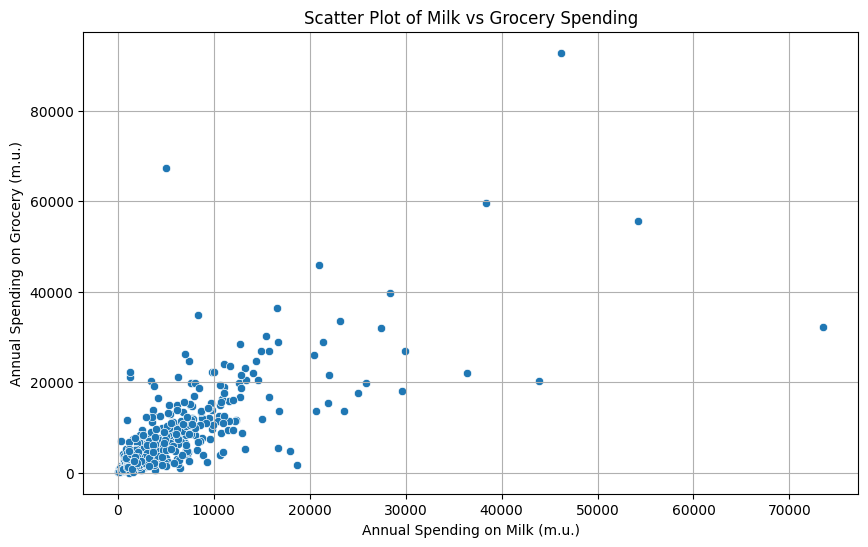

In [55]:
# Scatter plot for Milk vs Grocery spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Milk', y='Grocery', data=wholesale_data)
plt.title('Scatter Plot of Milk vs Grocery Spending')
plt.xlabel('Annual Spending on Milk (m.u.)')
plt.ylabel('Annual Spending on Grocery (m.u.)')
plt.grid(True)
plt.show()


The scatter plot above shows the relationship between annual spending on milk (x-axis) and grocery products (y-axis). There seems to be a positive correlation between these two variables, indicating that customers who spend more on milk also tend to spend more on grocery products.

- create an annotated clustermap of the correlations between spending on different categories

<Figure size 1000x800 with 0 Axes>

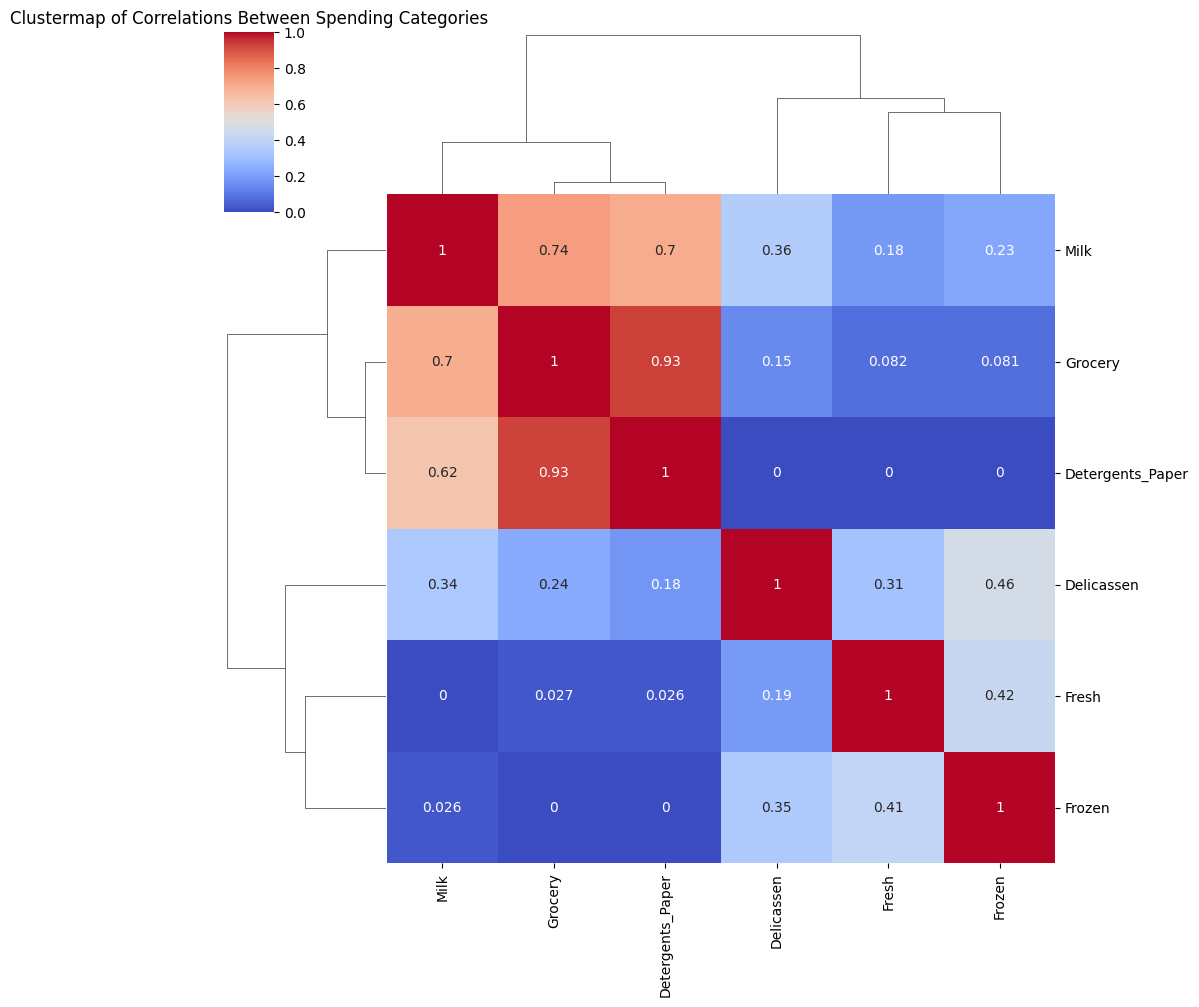

In [56]:
# Calculating the correlation matrix
correlation_matrix = wholesale_data.iloc[:, 2:].corr()

# Creating an annotated clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm", standard_scale=1)
plt.title('Clustermap of Correlations Between Spending Categories')
plt.show()


The clustermap above visualizes the correlations between different spending categories in the wholesale customers dataset. The color intensity and the annotations represent the strength and direction of the correlations. Categories that are closely grouped together in the dendrograms (tree-like structures) have more similar spending patterns.

- Create a variety of models testing different epsilon values.

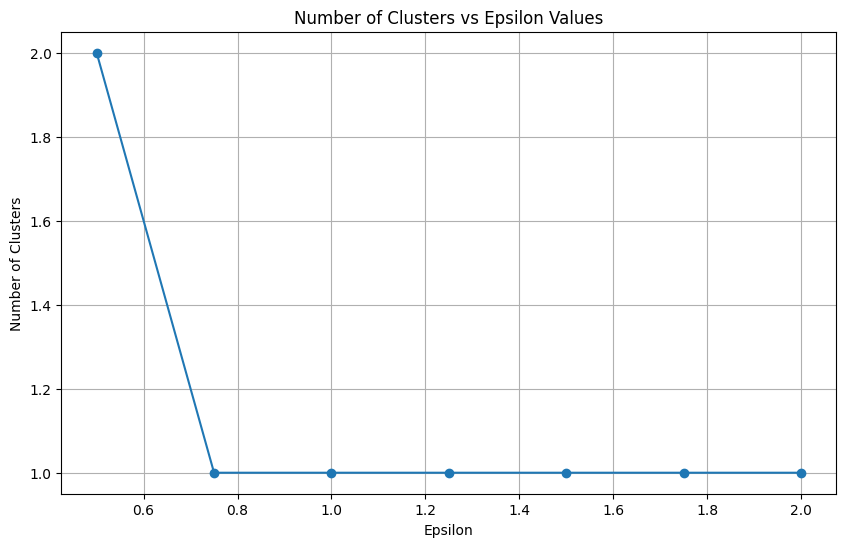

{0.5: 2, 0.75: 1, 1: 1, 1.25: 1, 1.5: 1, 1.75: 1, 2: 1}

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preparing data for DBSCAN (using only a subset of features for simplicity)
dbscan_data = wholesale_data[['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
dbscan_data_scaled = StandardScaler().fit_transform(dbscan_data)

# Testing different epsilon values
epsilon_values = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
clusters = {}

for epsilon in epsilon_values:
    dbscan = DBSCAN(eps=epsilon, min_samples=5).fit(dbscan_data_scaled)
    # Counting the number of clusters (excluding noise)
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    clusters[epsilon] = n_clusters

# Plotting the number of clusters for each epsilon value
plt.figure(figsize=(10, 6))
plt.plot(list(clusters.keys()), list(clusters.values()), marker='o')
plt.title('Number of Clusters vs Epsilon Values')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()

clusters



The plot above shows the number of clusters identified by the DBSCAN algorithm for different epsilon values. Here are some observations:

- For an epsilon value of 0.5, the algorithm identified 2 clusters.
-For epsilon values of 0.75 and above, the algorithm consistently identified only 1 cluster.

This suggests that at higher epsilon values, the data points are being grouped into a single cluster, indicating that these values might be too large for this particular dataset. On the other hand, an epsilon value of 0.5 results in multiple clusters, which might be more meaningful for analysis.

- Based on the plot that you had from the last part, retrain a DBSCAN model with a reasonable epsilon value

In [61]:
# Retraining the DBSCAN model with epsilon = 0.5
dbscan_optimal = DBSCAN(eps=0.5, min_samples=5).fit(dbscan_data_scaled)

# Extracting labels
labels = dbscan_optimal.labels_

# Adding cluster labels to the original data for analysis
wholesale_data['Cluster'] = labels

# Displaying the first few rows with cluster labels
wholesale_data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,-1


The DBSCAN model has been retrained with an epsilon value of 0.5. The `Cluster` column has been added to the original dataset, indicating the cluster assignment for each data point. In DBSCAN, the label `-1` indicates noise, i.e., points that do not belong to any cluster.

To provide further insights, we can explore the characteristics of each cluster, such as the average spending in each category. This will help us understand the profiles of the different clusters identified. Let's do that.

In [62]:
# Grouping the data by cluster and calculating mean values for each category
cluster_profiles = wholesale_data.groupby('Cluster').mean()

# Displaying the cluster profiles
cluster_profiles


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
-1,1.616162,2.464646,14473.868687,13085.606061,18005.444444,5865.474747,7365.676768,3206.292929
0,1.241071,2.559524,11299.610119,3671.544643,5049.523810,2272.738095,1591.273810,982.395833
1,1.000000,3.000000,10109.800000,4248.600000,3876.600000,1465.600000,797.400000,4687.000000


The cluster profiles based on the mean values of each spending category are as follows:

- **Cluster -1 (Noise):**
  - Higher average spending across all categories, especially in Milk, Grocery, Detergents_Paper, and Delicassen.
  - This cluster represents outliers or unique customers with distinct spending habits compared to the majority.

- **Cluster 0:**
  - Moderate spending in Fresh, Milk, and Grocery categories.
  - Lower spending in Frozen, Detergents_Paper, and Delicassen.
  - This group represents customers with a balanced spending pattern across various product categories.

- **Cluster 1:**
  - Similar to Cluster 0 but with slightly lower average spending in most categories except Delicassen, where spending is notably higher.
  - This cluster might represent customers who are more focused on Delicassen products.

These insights provide a nuanced understanding of the different customer segments in the wholesale dataset. Each cluster has distinct spending patterns, which can be valuable for targeted marketing strategies, inventory management, and other business decisions.


## Image segmentation


Image segmentation is a computer vision task that involves dividing an image into meaningful and semantically coherent regions or segments. The goal is to partition an image into regions that share similar visual characteristics, such as color, texture, intensity, or other features. Each segment typically represents a distinct object or region of interest within the image.

##<font color="red">**Question 4**</font>
In this question, you are supposed to segmente an image using KMeans clustering.


In [63]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
#load_sample_image dataset from scikit learn consists of numpy array of a single sample image

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

- Load a sample flower image from load_sample_image scikit learn dataset and show the image


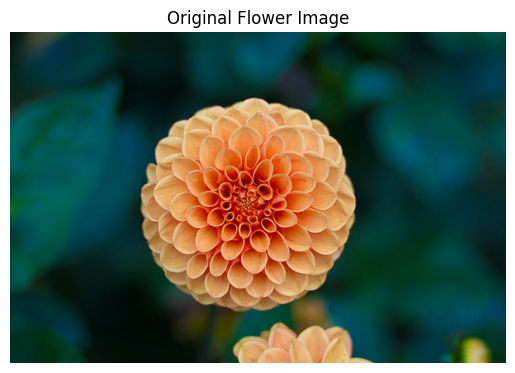

In [64]:
# Load the sample flower image
flower = load_sample_image("flower.jpg")

# Display the image
plt.imshow(flower)
plt.title("Original Flower Image")
plt.axis('off')  # Turn off axis numbers and labels
plt.show()

- Get shape, scale, reshape

In [65]:
# Get shape of the image
n_rows, n_cols, n_colors = flower.shape

# Scale the values to be between 0 and 1
flower_scaled = flower / 255.0

# Reshape the image to be a 2D array, where each row is a color (RGB)
flower_reshaped = flower_scaled.reshape(-1, 3)

- Use KMeans clustering and get the different colored images


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


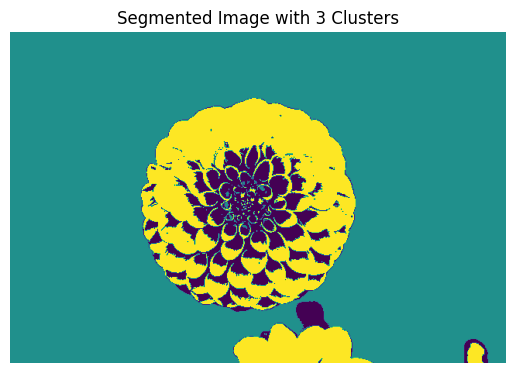

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


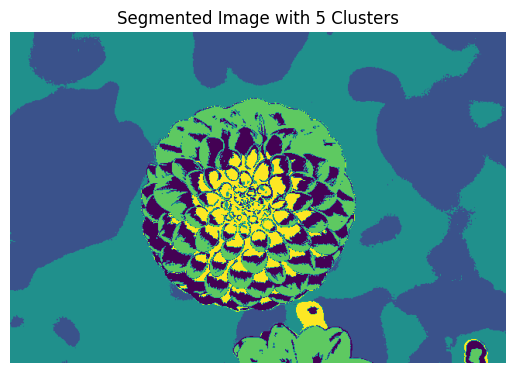

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


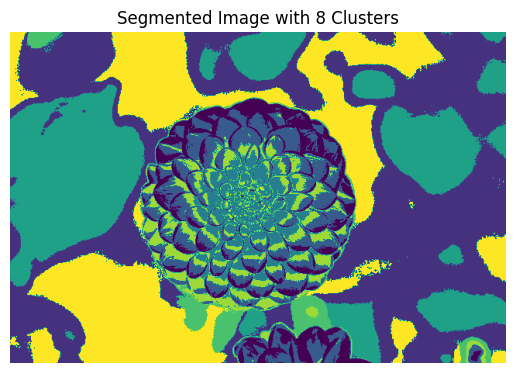

In [68]:
n_clusters = [3, 5, 8]  # Example cluster numbers

# For each number of clusters
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flower_reshaped)

    # Get labels for all points
    labels = kmeans.labels_

    # Create a new image with the same shape as the original
    flower_clustered = labels.reshape(n_rows, n_cols)

    # Display the segmented image
    plt.figure()
    plt.imshow(flower_clustered)
    plt.title(f"Segmented Image with {k} Clusters")
    plt.axis('off')
    plt.show()


## Gaussian Mixture Model

**Gaussian Mixture Model** (GMM) is a probabilistic model that represents a mixture of multiple Gaussian (normal) distributions. Each component Gaussian distribution in the mixture represents a cluster or a subpopulation within the overall dataset. GMMs are commonly used for modeling complex probability distributions and are frequently applied in the field of machine learning, particularly in unsupervised learning tasks such as clustering and density estimation.

##<font color="red">**Question 5**</font>
To deal with GMM, we will use **CC GENERAL** dataset.

Following is the Data Dictionary for Credit Card dataset :

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user


In [69]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Load dataset

In [94]:
file_path = 'CC_GENERAL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


- Standardize data, Normalize and Reduce the dimensions of the data

In [95]:
# Dropping the CUST_ID column as it is categorical and not needed for clustering
data.drop('CUST_ID', axis=1, inplace=True)

# Handling missing values
data.fillna(method ='ffill', inplace=True)

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Normalize data
normalized_data = normalize(scaled_data)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,-0.489949,-0.679976
1,-0.519099,0.544828
2,0.330633,0.268879
3,-0.481656,-0.097609
4,-0.563512,-0.482506
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176867
8947,0.188818,-0.248155
8948,-0.313093,-0.171112


- Use Gaussian Mixture Model

In [91]:
# # Determining the optimal number of clusters using the silhouette score
# silhouette_scores = []
# n_cluster_list = range(2, 11)  # Testing for clusters from 2 to 10

# for n_clusters in n_cluster_list:
#     gmm = GaussianMixture(n_components=n_clusters, random_state=0)
#     cluster_labels = gmm.fit_predict(reduced_data)
#     silhouette_avg = silhouette_score(reduced_data, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Finding the number of clusters with the highest silhouette score
# optimal_n_clusters = n_cluster_list[silhouette_scores.index(max(silhouette_scores))]

In [92]:
# # Fitting GMM with the optimal number of clusters
# gmm_optimal = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
# gmm_optimal.fit(reduced_data)
# labels = gmm_optimal.predict(reduced_data)

# # Adding the cluster labels to the DataFrame
# reduced_data['Cluster'] = labels
# reduced_data.head()

# # Getting the cluster centers
# centers = gmm.means_

In [98]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4) # You can choose the number of components
gmm.fit(reduced_data)

# Predicting the clusters
labels = gmm.predict(reduced_data)
reduced_data['Cluster'] = labels

# Getting the cluster centers
centers = gmm.means_


- Visualize the clustering and analyse

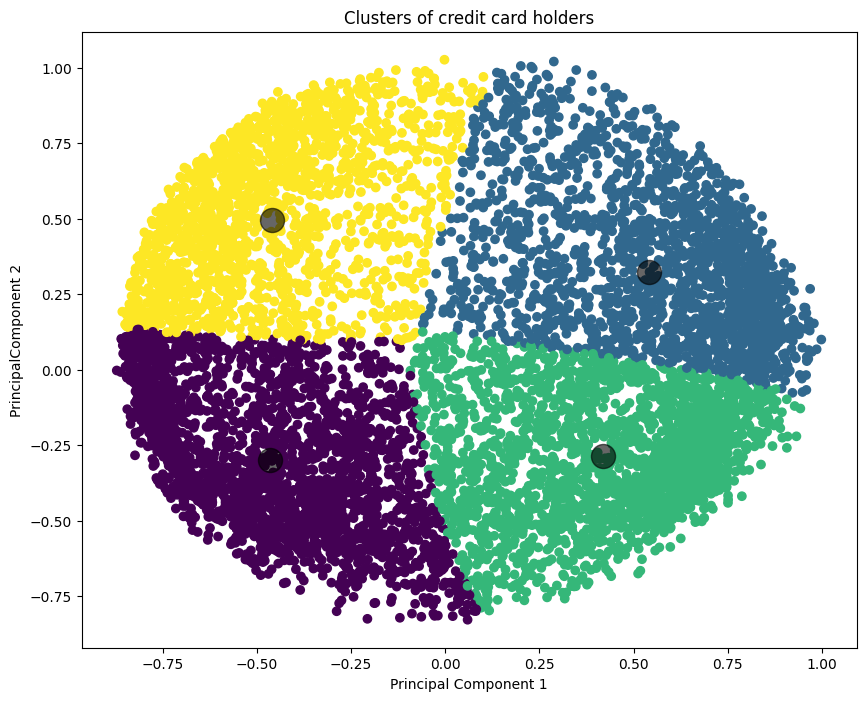

In [99]:
# Visualize the clustering
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data['PC1'], reduced_data['PC2'], c=reduced_data['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6)
plt.title('Clusters of credit card holders')
plt.xlabel('Principal Component 1')
plt.ylabel('PrincipalComponent 2')
plt.show()

Based on the visualization, it appears that the Gaussian Mixture Model (GMM) has been used to identify four distinct clusters among the credit card holders, as indicated by the four different colors. The black dots represent the centroids of each cluster. Here are some observations and potential insights from the clustering:

1. **Cluster Distribution**: The clusters seem to be well-separated, indicating that the GMM has done a reasonable job at distinguishing between different groups within the data. Each cluster represents a group of customers with similar credit card usage and behavior characteristics.

2. **Cluster Characteristics**: To gain deeper insights into each cluster, you would typically examine the average values of the original features for each cluster's members. This would help to understand what differentiates one cluster from another. For example, one cluster might represent customers with high balances and low purchase frequencies, while another might represent those with low balances and high purchase frequencies.

3. **Cluster Centroids**: The centroids (black dots) suggest the average location of each cluster in the reduced two-dimensional space created by PCA. Their positions can provide insights into the density and the spread of each cluster. A centroid located far from others could indicate a more distinct group of customers.

4. **Principal Components**: The x and y axes represent the first and second principal components, respectively. These are combinations of the original variables that explain the most variance. The plot suggests that the first principal component (PC1) may capture information related to the volume of transactions or balances, while the second component (PC2) could be related to the frequency or the nature of the purchases.

5. **Outliers**: There are a few points that are distant from the main clusters. These could represent outliers in the dataset, which could be customers with unusual credit card usage patterns.

6. **Business Insights**: Depending on the business's goal, each cluster can be targeted with specific marketing strategies. For example, a cluster with high balances and low purchase frequencies might be targeted with cashback offers on purchases to encourage more spending.

To provide more precise interpretations, we would need to map these clusters back to the original feature space and analyze the defining characteristics of each cluster in terms of actual credit card usage patterns. Additionally, the silhouette score could be calculated to evaluate the quality of the clusters, although it is not shown here.

In [100]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(reduced_data, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.715594550614559


In [105]:
# Predicting the clusters for original data
data['Cluster'] = labels

# Calculating the mean for each feature for each cluster
cluster_characteristics =data.groupby('Cluster').mean()
cluster_characteristics

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,775.571976,0.769025,202.482008,160.024929,42.632409,421.650816,0.135521,0.066935,0.064921,0.087250,1.509240,2.174129,2759.436153,758.342000,462.716179,0.056172,11.511727
1,2380.784322,0.980019,3121.901202,1963.827682,1158.415344,891.673106,0.911776,0.561133,0.684912,0.118202,2.900153,42.972491,7163.195017,3499.487383,1375.627579,0.202176,11.786042
2,404.056388,0.862971,747.675989,262.163039,486.093252,54.632799,0.797857,0.148121,0.663714,0.013610,0.237337,14.717729,3169.097944,859.568308,446.673165,0.313740,11.443627
3,3569.264061,0.957221,261.041165,205.933600,55.166504,3298.710527,0.153224,0.092486,0.063636,0.405027,10.757101,2.986087,6168.389108,2553.012253,1534.999793,0.030591,11.325217
